# CKME136 - Capstone Project - Toronto Real Estate Listings
## Step 4: Regression Models and Evaluation - with Scikit Learn

<div class="alert alert-block alert-info">
4A. Imports for predictions

In [117]:
import pandas as pd
import numpy as np

from scipy import stats

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, KFold
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from numpy import array

%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:50% !important; }</style>"))

<div class="alert alert-block alert-info">
4B. Read in cleaned dataset by using provided index and check output

In [105]:
df_all_features_dataset = pd.read_csv('cleaned_combined_listing_features_v8.csv', index_col=0)

In [113]:
df_all_features_dataset.dtypes

listing_url                         object
listing_id                           int64
extras_fridge                      float64
extras_stove                       float64
extras_stainless_steel             float64
extras_pool                        float64
extras_gym                         float64
extras_storage                     float64
extras_locker                      float64
extras_gas                         float64
extras_dishwasher                  float64
features_view                      float64
features_park                      float64
features_public_transit            float64
features_basementbrick             float64
features_concrete_exterior         float64
features_hospital                  float64
features_library                   float64
postal_code_principal_component    float64
community_principal_component      float64
1 1/2 Storey                       float64
2 1/2 Storey                       float64
2-Storey                           float64
3-Storey   

In [107]:
df_all_features_dataset.head()

,listing_url,listing_id,extras_fridge,extras_stove,extras_stainless_steel,extras_pool,extras_gym,extras_storage,extras_locker,extras_gas,...,EXERCISE sqft_log,LIBRARY sqft_log,2ND BEDROOM sqft_log,FOYER sqft_log,REC sqft_log,DEN sqft_log,DINING ROOM sqft_log,FAMILY ROOM sqft_log,OFFICE sqft_log,total_room_sqft_log
0,https://toronto.listing.ca/168-bonis-ave-1211.E4349723.htm#15-1dr,4349723,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,2.68,0.00,0.00,2.66,3.30,0.00,0.00,4.82
1,https://toronto.listing.ca/3300-don-mills-rd-310.C4359682.htm#15-oy,4359682,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,2.48,0.00,0.00,0.00,2.68,0.00,0.00,4.45
2,https://toronto.listing.ca/65-east-liberty-st-627.C4353207.htm#15-16k,4353207,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,2.51,0.00,0.00,3.46
3,https://toronto.listing.ca/45-skylark-rd.W4341830.htm#15-1r3,4341830,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,2.28,0.00,3.09,0.00,2.83,0.00,0.00,4.61
4,https://toronto.listing.ca/88-north-bonnington-ave.E4252454.htm#15-2n1,4252454,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.82,0.00,0.00,0.00,0.00,0.00,0.00,3.76


In [108]:
df_all_features_dataset.count()

listing_url                        3290
listing_id                         3290
extras_fridge                      3290
extras_stove                       3290
extras_stainless_steel             3290
extras_pool                        3290
extras_gym                         3290
extras_storage                     3290
extras_locker                      3290
extras_gas                         3290
extras_dishwasher                  3290
features_view                      3290
features_park                      3290
features_public_transit            3290
features_basementbrick             3290
features_concrete_exterior         3290
features_hospital                  3290
features_library                   3290
postal_code_principal_component    3290
community_principal_component      3290
1 1/2 Storey                       3290
2 1/2 Storey                       3290
2-Storey                           3290
3-Storey                           3290
Apartment                          3290


<div class="alert alert-block alert-info">
4C. Generate features/labels datasets and training and test datasets

In [109]:
# values to predict
labels = np.array(df_all_features_dataset['listing_price_int_log'])
# Remove the labels from the features
features = df_all_features_dataset.drop(['listing_url', 'listing_id', 'listing_price_int_log'], axis = 1)
features = np.array(features)

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3)

<div class="alert alert-block alert-info">
4C. Create regression models

In [110]:
# 1. Instantiate, train, and predict with linear regression model
lm = linear_model.LinearRegression()
lm.fit(train_features, train_labels)
lm_predictions = lm.predict(test_features)
lm_predictions_train = lm.predict(train_features)
lm_model_name = 'Linear Regression Model'
print("Training is complete")

Training is complete


In [57]:
# 2. Instantiate, train, and predict with linear elastic net regression model
en = linear_model.ElasticNet(random_state=1)
en.fit(train_features, train_labels)
en_predictions = en.predict(test_features)
en_predictions_train = en.predict(train_features)
en_model_name = 'Linear Elastic Net Regression Model'
print("Training is complete")

Training is complete


In [58]:
# 3. Instantiate, train, and predict with linear ridge regression model
rlm = linear_model.Ridge(alpha=0.1)
rlm.fit(train_features, train_labels)
rlm_predictions = rlm.predict(test_features)
rlm_predictions_train = rlm.predict(train_features)
rlm_model_name = 'Ridge Regression Model'
print("Training is complete")

Training is complete


In [59]:
# 4. Instantiate, train, and predict with linear lasso regression model
llm = linear_model.Lasso(alpha=0.1)
llm.fit(train_features, train_labels)
llm_predictions = llm.predict(test_features)
llm_predictions_train = llm.predict(train_features)
llm_model_name = 'Lasso Regression Model'
print("Training is complete")

Training is complete


In [103]:
# 5. Instantiate, train, and predict with Random Forest regression model
rf = RandomForestRegressor(bootstrap = False, max_depth = 70, max_features = 'sqrt', min_samples_leaf = 1,min_samples_split = 3,n_estimators = 1800)
rf.fit(train_features, train_labels)
rf_predictions = rf.predict(test_features)
rf_predictions_train = rf.predict(train_features)
rf_model_name = 'Random Forest Regression Model'
print("Training is complete")

Training is complete


In [61]:
# 6. Instantiate, train, and predict with Gradient Boost Regression Model
gbr = GradientBoostingRegressor(n_estimators=400, learning_rate=0.1, max_depth=1, random_state=0, loss='huber')
gbr.fit(train_features, train_labels)
gbr_predictions = gbr.predict(test_features)
gbr_predictions_train = gbr.predict(train_features)
gbr_model_name = 'Gradient Boost Regression Model'
print("Training is complete")

Training is complete


In [62]:
# 7. Instantiate, train, and predict with Ada Boost Regression Model
abr = AdaBoostRegressor(n_estimators=100, learning_rate=0.1)
abr.fit(train_features, train_labels)
abr_predictions = abr.predict(test_features)
abr_predictions_train = abr.predict(train_features)
abr_model_name = 'Ada Boost Regression Model'
print("Training is complete")

Training is complete


In [13]:
# THIS TAKE TOO LONG TO TRAIN
# 8. Instantiate, train, and predict with Support Vector Regression Model
# lsv = SVR(kernel = 'linear')
# lsv.fit(train_features, train_labels)
# lsv_predictions = lsv.predict(test_features)
# lsv_predictions_train = lsv.predict(train_features)
# lsv_model_name = 'Linear Support Vector Regression Model'
# print("Training is complete")

<div class="alert alert-block alert-info">
4D. Evaluate models

In [99]:
# function to generate model statistics test vs. predictions
def model_statistics(model_name, model, model_predictions, train_predictions):
    print (model_name)
    print ("Test Mean squared error: %.5f" % mean_squared_error(test_labels, model_predictions))
    print ('Test r^2 score: %.5f' % r2_score(test_labels, model_predictions))
#     print ('Train r^2 score: %.4f' % r2_score(train_labels, train_predictions))
    print ('10-fold cross validation MSE: %.5f' % cross_val_score(model, features, labels, cv=10, scoring='neg_mean_squared_error').mean())
    print ('10-fold cross validation score: %.5f' % cross_val_score(model, features, labels, cv=10).mean())

In [100]:
# function to show x predictions and actuals
def sample_labels_vs_predictions(model_predictions, number_of_predictions):
    model_predictions = np.exp(model_predictions)+1
    predictions_show = np.array((model_predictions)[0:number_of_predictions]).astype(float)
    actuals_show = np.array((np.exp(test_labels)+1)[0:number_of_predictions]).astype(float)
    # Calculate absolute error
    model_compare = pd.DataFrame({'predictions': predictions_show, 'actuals': actuals_show})
    model_compare['absolute_error'] = abs(model_compare.predictions - model_compare.actuals)

    print model_compare.head(number_of_predictions)

In [101]:
# Visualization of cross validation predictions vs. actual
def visualize_cross_validations(model_name, model):
    predicted = cross_val_predict(model, features, labels, cv=10)
    ax.set_xlabel('Labels')
    ax.set_ylabel('Predicted')
    ax.set_title(model_name+' 10-Fold Cross Validation Predictions vs. Targets')
    plt.show()

    fig, ax = plt.subplots(figsize=(16, 8))
    ax.scatter(labels, predicted, edgecolors=(0, 0, 0))
    ax.plot([labels.min(), labels.max()], [labels.min(), labels.max()], 'k--', lw=4)

Linear Regression Model
Test Mean squared error: 0.13601
Test r^2 score: 0.67492
10-fold cross validation MSE: -0.14187
10-fold cross validation score: 0.66722
     actuals  predictions  absolute_error
0  699002.00    546308.62       152693.38
1  448002.00    546575.44        98573.44
2 1398002.00   2025077.76       627075.76
3 1230002.00   1348499.02       118497.02
4  329002.00    618217.95       289215.95


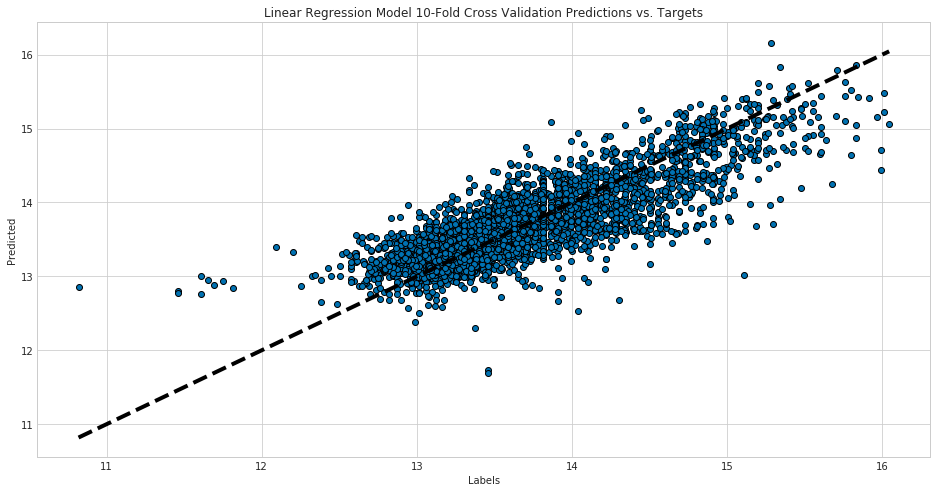

In [111]:
# Linear Model Evaluation
model_statistics(lm_model_name, lm, lm_predictions, lm_predictions_train)
sample_labels_vs_predictions(lm_predictions, 5)
visualize_cross_validations(lm_model_name, lm)

Linear Elastic Net Regression Model
Test Mean squared error: 0.43726
Test r^2 score: -0.00012
10-fold cross validation MSE: -0.42997
10-fold cross validation score: -0.00500
     actuals  predictions  absolute_error
0  485002.00    924564.85       439562.85
1  679002.00    924564.85       245562.85
2  569002.00    924564.85       355562.85
3  485002.00    924564.85       439562.85
4 1699902.00    924564.85       775337.15


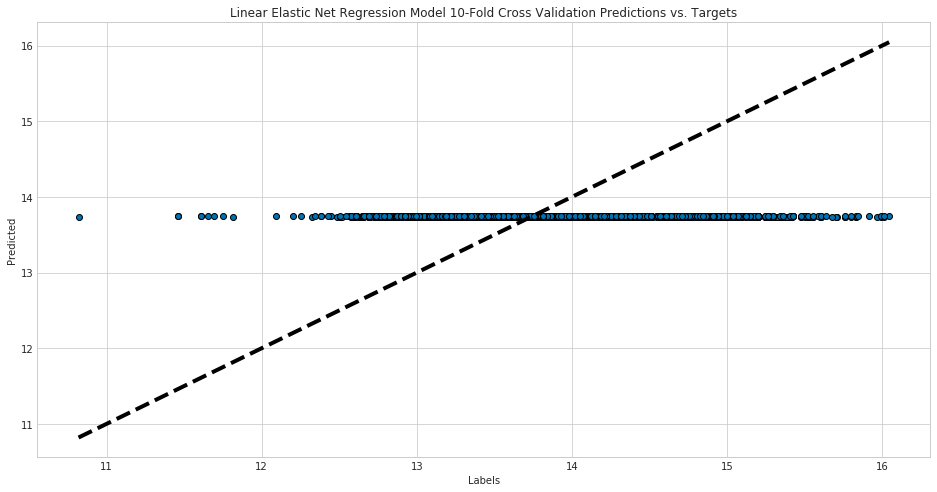

In [67]:
# Elastic Net Model Evaluation
model_statistics(en_model_name, en, en_predictions, en_predictions_train)
sample_labels_vs_predictions(en_predictions, 5)
visualize_cross_validations(en_model_name, en)

Ridge Regression Model
Test Mean squared error: 0.14521
Test r^2 score: 0.66787
10-fold cross validation MSE: -0.13946
10-fold cross validation score: 0.67298
     actuals  predictions  absolute_error
0  485002.00    859633.48       374631.48
1  679002.00    571108.73       107893.27
2  569002.00    574079.50         5077.50
3  485002.00    797534.01       312532.01
4 1699902.00   1027946.83       671955.17


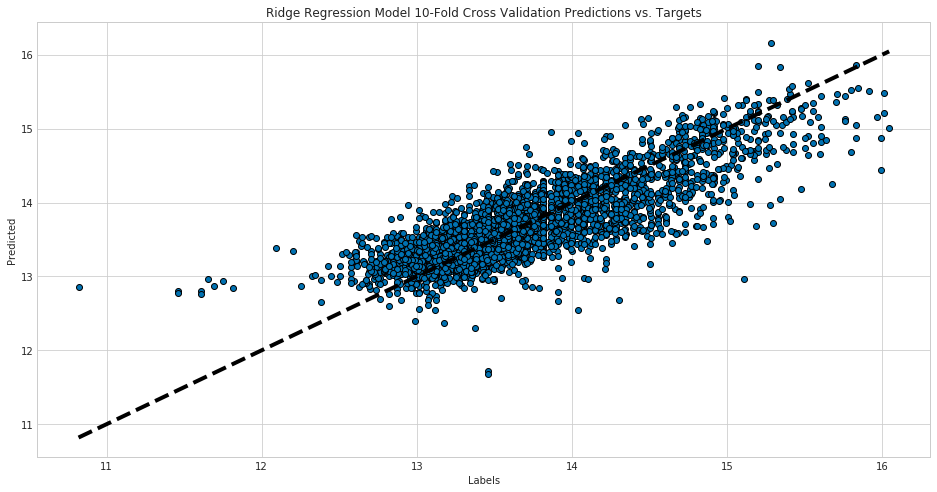

In [68]:
# Ridge Regression Model Evaluation
model_statistics(rlm_model_name, rlm, rlm_predictions, rlm_predictions_train)
sample_labels_vs_predictions(rlm_predictions, 5)
visualize_cross_validations(rlm_model_name, rlm)

Lasso Regression Model
Test Mean squared error: 0.27023
Test r^2 score: 0.38191
10-fold cross validation MSE: -0.25542
10-fold cross validation score: 0.40282
     actuals  predictions  absolute_error
0  485002.00    839228.35       354226.35
1  679002.00    735718.37        56716.37
2  569002.00    725584.68       156582.68
3  485002.00    877044.99       392042.99
4 1699902.00    902957.81       796944.19


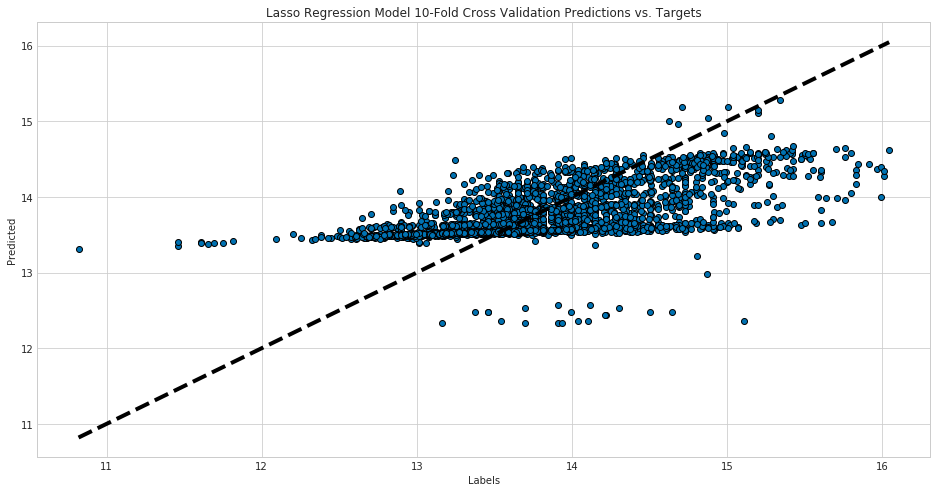

In [69]:
# Lasso Regression Model Evaluation
model_statistics(llm_model_name, llm, llm_predictions, llm_predictions_train)
sample_labels_vs_predictions(llm_predictions, 5)
visualize_cross_validations(llm_model_name, llm)

Random Forest Regression Model
Test Mean squared error: 0.04230
Test r^2 score: 0.89639
10-fold cross validation MSE: -0.04503
10-fold cross validation score: 0.89556
      actuals  predictions  absolute_error
0   589002.00    593449.12         4447.12
1   639890.00    662763.69        22873.69
2  1988002.00   1681608.86       306393.14
3   759902.00    999503.74       239601.74
4  2995002.00   2246032.61       748969.39
5   530002.00    547469.07        17467.07
6  1395002.00   1379181.99        15820.01
7  1200002.00    772797.67       427204.33
8   988002.00    992989.88         4987.88
9   439902.00    481329.52        41427.52
10 1999002.00   2215252.70       216250.70
11  649002.00    655195.17         6193.17
12 1699902.00   1215486.02       484415.98
13  359002.00    420989.71        61987.71
14 1149002.00   1397494.81       248492.81
15 1579002.00   1291112.84       287889.16
16  549802.00    539198.16        10603.84
17  990002.00    927837.31        62164.69
18  795902.00   

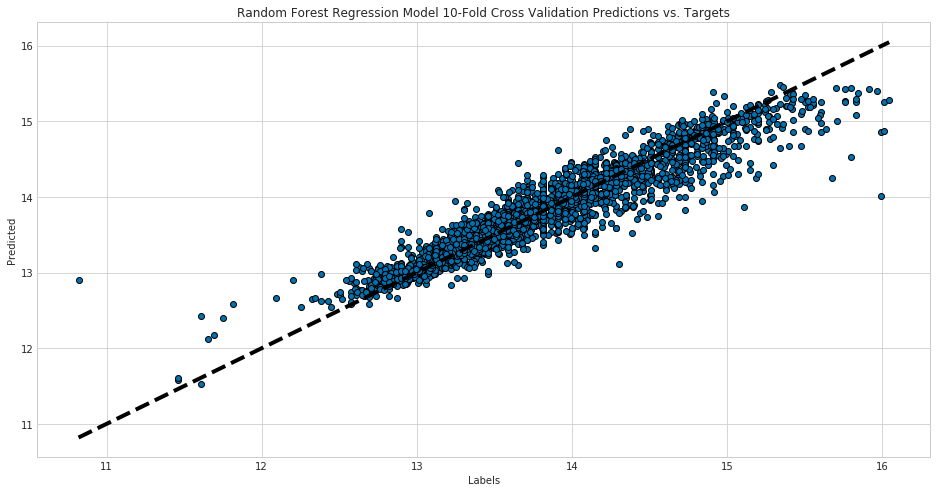

In [104]:
# Random Forest Model Evaluation
model_statistics(rf_model_name, rf, rf_predictions, rf_predictions_train)
sample_labels_vs_predictions(rf_predictions, 25)
visualize_cross_validations(rf_model_name, rf)

Gradient Boost Regression Model
Test Mean squared error: 0.04328
Test r^2 score: 0.90101
10-fold cross validation MSE: -0.05004
10-fold cross validation score: 0.88305
     actuals  predictions  absolute_error
0  485002.00    484761.23          240.77
1  679002.00    626071.58        52930.42
2  569002.00    492976.73        76025.27
3  485002.00    635649.32       150647.32
4 1699902.00   1074170.67       625731.33


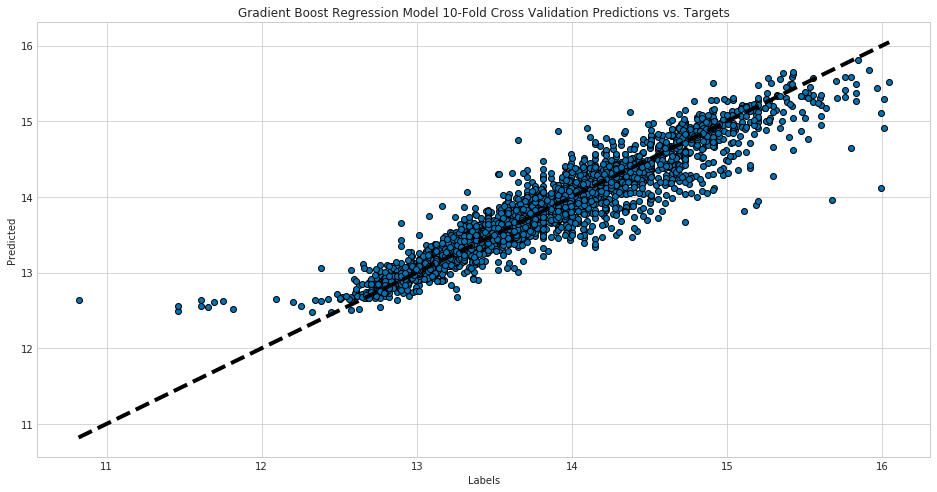

In [71]:
# Gradient Boost Model Evaluation
model_statistics(gbr_model_name, gbr, gbr_predictions, gbr_predictions_train)
sample_labels_vs_predictions(gbr_predictions, 5)
visualize_cross_validations(gbr_model_name, gbr)

Ada Boost Regression Model
Test Mean squared error: 0.05952
Test r^2 score: 0.86385
10-fold cross validation MSE: -0.06852
10-fold cross validation score: 0.84025
     actuals  predictions  absolute_error
0  485002.00    471004.12        13997.88
1  679002.00    640352.05        38649.95
2  569002.00    469996.33        99005.67
3  485002.00    634018.57       149016.57
4 1699902.00   1186410.92       513491.08


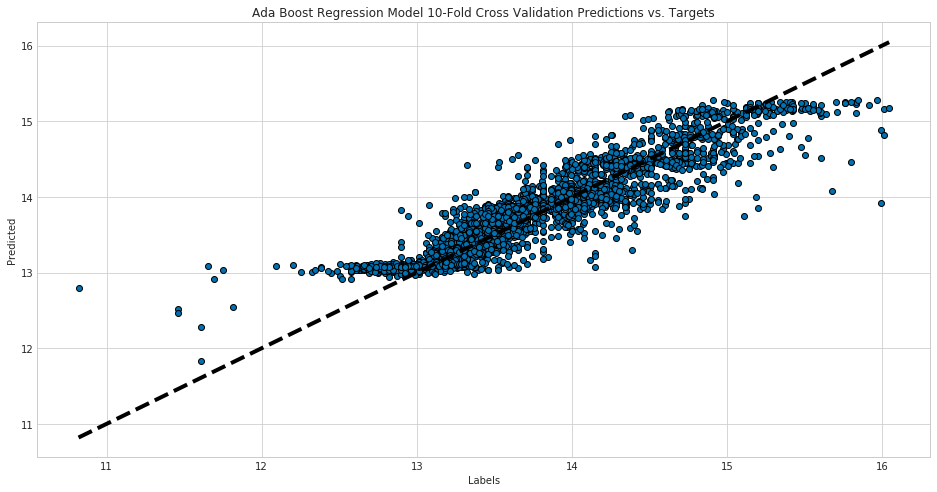

In [72]:
# Ada Boost Model Evaluation
model_statistics(abr_model_name, abr, abr_predictions, abr_predictions_train)
sample_labels_vs_predictions(abr_predictions, 5)
visualize_cross_validations(abr_model_name, abr)

In [24]:
# THIS TAKES TOO LONG TO TRAIN
# Linear Support Vector Model Evaluation
# model_statistics(lsv_model_name, lsv, lsv_predictions)
# sample_labels_vs_predictions(lsv_predictions, 5)
# visualize_cross_validations(lsv_model_name, lsv)

<div class="alert alert-block alert-info">
4E. Hyper Tune Parameters

In [118]:
#parameters of base random forest model
rf.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [48]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 4)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'bootstrap': [True, False], 'min_samples_leaf': [1, 2, 4], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'min_samples_split': [2, 5, 10], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 40, 70, 100, None]}


In [49]:
# Use the random grid to search for best hyperparameters - 100 combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(features, labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=1400, min_samples_split=5, max_features=auto, max_depth=40 
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=1400, min_samples_split=5, max_features=auto, max_depth=40 
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=1400, min_samples_split=5, max_features=auto, max_depth=40 
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=2000, min_samples_split=5, max_features=auto, max_depth=100 
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=2000, min_samples_split=5, max_features=auto, max_depth=100 
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=2000, min_samples_split=5, max_features=auto, max_depth=100 
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=200, min_samples_split=10, max_features=sqrt, max_depth=None 
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=200, min_samples_split=10, max_features=sqrt, max_depth=None 
[CV] bootstr

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  4.8min


[CV] bootstrap=False, min_samples_leaf=1, n_estimators=1800, min_samples_split=5, max_features=auto, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=1000, min_samples_split=5, max_features=sqrt, max_depth=None -   9.6s
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=1000, min_samples_split=5, max_features=sqrt, max_depth=None -   9.4s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=1800, min_samples_split=5, max_features=auto, max_depth=None 
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=1800, min_samples_split=5, max_features=auto, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=1000, min_samples_split=10, max_features=sqrt, max_depth=10 -   7.4s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=400, min_samples_split=2, max_features=sqrt, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=400, min_samples_split=2, max_features=sqrt, max_depth=10 -   3.1s
[CV] bootstrap=True, min_samples_leaf

[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=200, min_samples_split=5, max_features=sqrt, max_depth=10 -   1.9s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=200, min_samples_split=5, max_features=sqrt, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=200, min_samples_split=5, max_features=sqrt, max_depth=10 -   1.5s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=1200, min_samples_split=2, max_features=auto, max_depth=None 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1600, min_samples_split=10, max_features=auto, max_depth=10 -  14.3s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=1200, min_samples_split=2, max_features=auto, max_depth=None 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1600, min_samples_split=10, max_features=auto, max_depth=10 -  11.7s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=1200, min_samples_split=2, max_features=auto, max_depth=None 
[CV]  bootstrap=True, min_samples_leaf=4, n_

[CV] bootstrap=False, min_samples_leaf=1, n_estimators=1000, min_samples_split=5, max_features=sqrt, max_depth=40 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=1200, min_samples_split=5, max_features=auto, max_depth=100 -  10.6s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=1000, min_samples_split=5, max_features=sqrt, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=2000, min_samples_split=5, max_features=auto, max_depth=None -  19.4s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=1000, min_samples_split=5, max_features=sqrt, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=2000, min_samples_split=5, max_features=auto, max_depth=None -  18.9s
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=2000, min_samples_split=2, max_features=sqrt, max_depth=70 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=1200, min_samples_split=5, max_features=auto, max_depth=100 -  10.4s
[CV] bootstrap=True, min_samples_leaf=1, 

[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=200, min_samples_split=2, max_features=sqrt, max_depth=70 -   1.7s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=1200, min_samples_split=10, max_features=auto, max_depth=None 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=200, min_samples_split=2, max_features=sqrt, max_depth=70 -   1.7s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=2000, min_samples_split=10, max_features=auto, max_depth=100 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=1200, min_samples_split=10, max_features=auto, max_depth=10 -   9.3s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=2000, min_samples_split=10, max_features=auto, max_depth=100 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=1200, min_samples_split=10, max_features=auto, max_depth=10 -  10.5s
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=1200, min_samples_split=10, max_features=auto, max_depth=10 -   9.5s
[CV] bootstrap=False, min_sam

[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed: 75.9min


[CV] bootstrap=True, min_samples_leaf=2, n_estimators=1400, min_samples_split=10, max_features=sqrt, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=1400, min_samples_split=10, max_features=sqrt, max_depth=100 -  16.4s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=1400, min_samples_split=10, max_features=sqrt, max_depth=100 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=1200, min_samples_split=10, max_features=auto, max_depth=None -  11.4s
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=1200, min_samples_split=10, max_features=auto, max_depth=None -  11.6s
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=600, min_samples_split=10, max_features=auto, max_depth=100 
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=600, min_samples_split=10, max_features=auto, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=1400, min_samples_split=10, max_features=sqrt, max_depth=100 -  12.0s
[CV] bootstrap=True, min_samples_l

[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=1000, min_samples_split=5, max_features=auto, max_depth=40 -   8.3s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=1600, min_samples_split=2, max_features=auto, max_depth=70 
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=200, min_samples_split=10, max_features=auto, max_depth=10 -   1.6s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=1600, min_samples_split=2, max_features=auto, max_depth=70 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1400, min_samples_split=5, max_features=sqrt, max_depth=10 -   9.9s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=1600, min_samples_split=2, max_features=auto, max_depth=70 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1400, min_samples_split=5, max_features=sqrt, max_depth=10 -  11.6s
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=1600, min_samples_split=10, max_features=auto, max_depth=70 
[CV]  bootstrap=True, min_samples_leaf=4, n_est

[CV] bootstrap=True, min_samples_leaf=1, n_estimators=400, min_samples_split=2, max_features=sqrt, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=2000, min_samples_split=5, max_features=sqrt, max_depth=70 -  19.5s
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=400, min_samples_split=2, max_features=sqrt, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=2000, min_samples_split=5, max_features=sqrt, max_depth=70 -  20.6s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=200, min_samples_split=5, max_features=sqrt, max_depth=70 
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=400, min_samples_split=2, max_features=sqrt, max_depth=10 -   3.3s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=200, min_samples_split=5, max_features=sqrt, max_depth=70 
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=800, min_samples_split=5, max_features=sqrt, max_depth=70 -   6.9s
[CV] bootstrap=False, min_samples_leaf=2, n_estimator

[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=1200, min_samples_split=10, max_features=auto, max_depth=None -  10.0s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=400, min_samples_split=2, max_features=sqrt, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=1200, min_samples_split=10, max_features=sqrt, max_depth=100 -  12.4s
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=1200, min_samples_split=10, max_features=auto, max_depth=None -  11.0s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=400, min_samples_split=2, max_features=sqrt, max_depth=10 
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=400, min_samples_split=2, max_features=sqrt, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=1200, min_samples_split=10, max_features=auto, max_depth=None -  10.9s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=800, min_samples_split=2, max_features=sqrt, max_depth=70 
[CV]  bootstrap=False, min_samples_leaf=

[CV] bootstrap=True, min_samples_leaf=1, n_estimators=400, min_samples_split=10, max_features=auto, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=400, min_samples_split=5, max_features=sqrt, max_depth=10 -   6.0s
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=400, min_samples_split=10, max_features=auto, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=400, min_samples_split=5, max_features=sqrt, max_depth=10 -   3.2s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=1200, min_samples_split=2, max_features=sqrt, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=2000, min_samples_split=5, max_features=sqrt, max_depth=100 -  18.9s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=1200, min_samples_split=2, max_features=sqrt, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=1800, min_samples_split=2, max_features=auto, max_depth=100 -  16.9s
[CV] bootstrap=False, min_samples_leaf=1, n_esti

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 159.4min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'bootstrap': [True, False], 'min_samples_leaf': [1, 2, 4], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'min_samples_split': [2, 5, 10], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 40, 70, 100, None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring=None, verbose=2)

In [50]:
# Best parameters found by random search
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 70,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 2000}

In [53]:
# Test the best parameters found by random search
best_rf = rf_random.best_estimator_
best_rf_predictions = best_rf.predict(test_features)
best_rf_predictions_train = best_rf.predict(train_features)
best_rf_model_name = 'Best Parameters for Random Forest Model'
model_statistics(best_rf_model_name, best_rf, best_rf_predictions, best_rf_predictions_train)

Best Parameters for Random Forest Model
Mean squared error: 29028.94
Test r^2 score: 0.99
Train r^2 score: 0.99
10-fold cross validation score: 0.82


In [73]:
# Random Forest parameter grid to test
rf_param_grid = {
    'bootstrap': [False],
    'max_depth': [60, 70, 80, 90],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1],
    'min_samples_split': [3, 5, 7],
    'n_estimators': [1800, 1900, 2000, 2100, 2200]
}

abr_param_grid = {
    'learning_rate': [0.02, 0.04, 0.06, 0.08, 0.1, 0.2],
    'n_estimators': [50, 200, 400, 600, 800, 1000],
    'loss': ['linear', 'square', 'exponential']
}

gbr_param_grid = {
    'learning_rate': [0.02, 0.04, 0.06, 0.08, 0.1, 0.2],
    'n_estimators': [50, 200, 400, 600, 800, 1000],
    'loss':  ['ls', 'lad', 'huber', 'quantile']
}

print rf_param_grid
print abr_param_grid
print gbr_param_grid

{'bootstrap': [False], 'min_samples_leaf': [1], 'n_estimators': [1800, 1900, 2000, 2100, 2200], 'min_samples_split': [3, 5, 7], 'max_features': ['sqrt'], 'max_depth': [60, 70, 80, 90]}
{'n_estimators': [50, 200, 400, 600, 800, 1000], 'loss': ['linear', 'square', 'exponential'], 'learning_rate': [0.02, 0.04, 0.06, 0.08, 0.1, 0.2]}
{'n_estimators': [50, 200, 400, 600, 800, 1000], 'loss': ['ls', 'lad', 'huber', 'quantile'], 'learning_rate': [0.02, 0.04, 0.06, 0.08, 0.1, 0.2]}


In [76]:
# Random Forest parameter tuning
rf_grid_search = GridSearchCV(estimator = RandomForestRegressor(), param_grid = rf_param_grid, cv = 3, n_jobs = -1, verbose = 2)
rf_grid_search.fit(features, labels)


Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=1800, max_features=sqrt, min_samples_split=3, max_depth=60 
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=1800, max_features=sqrt, min_samples_split=3, max_depth=60 
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=1800, max_features=sqrt, min_samples_split=3, max_depth=60 
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=1900, max_features=sqrt, min_samples_split=3, max_depth=60 
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=1900, max_features=sqrt, min_samples_split=3, max_depth=60 
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=1900, max_features=sqrt, min_samples_split=3, max_depth=60 
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=2000, max_features=sqrt, min_samples_split=3, max_depth=60 
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=2000, max_features=sqrt, min_samples_split=3, max_depth=60 
[CV] bootstrap=Fal

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  4.9min


[CV] bootstrap=False, min_samples_leaf=1, n_estimators=2000, max_features=sqrt, min_samples_split=5, max_depth=60 
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=2100, max_features=sqrt, min_samples_split=5, max_depth=60 
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=2000, max_features=sqrt, min_samples_split=3, max_depth=60 -  17.6s
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=2100, max_features=sqrt, min_samples_split=3, max_depth=60 -  17.6s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=2100, max_features=sqrt, min_samples_split=5, max_depth=60 
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=2100, max_features=sqrt, min_samples_split=3, max_depth=60 -  17.6s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=2100, max_features=sqrt, min_samples_split=5, max_depth=60 
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=2200, max_features=sqrt, min_samples_split=5, max_depth=60 
[CV]  bootstrap=False, min_samples_leaf=1, n_estimato

[CV] bootstrap=False, min_samples_leaf=1, n_estimators=2200, max_features=sqrt, min_samples_split=3, max_depth=70 
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=2200, max_features=sqrt, min_samples_split=7, max_depth=60 -  16.5s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=2200, max_features=sqrt, min_samples_split=3, max_depth=70 
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=1800, max_features=sqrt, min_samples_split=3, max_depth=70 -  16.5s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=1800, max_features=sqrt, min_samples_split=5, max_depth=70 
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=1800, max_features=sqrt, min_samples_split=3, max_depth=70 -  15.0s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=1800, max_features=sqrt, min_samples_split=5, max_depth=70 
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=2200, max_features=sqrt, min_samples_split=7, max_depth=60 -  18.3s
[CV] bootstrap=False, min_samples_leaf=1, n_

[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=1900, max_features=sqrt, min_samples_split=7, max_depth=70 -  16.4s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=1900, max_features=sqrt, min_samples_split=3, max_depth=80 
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=2200, max_features=sqrt, min_samples_split=5, max_depth=70 -  18.5s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=1900, max_features=sqrt, min_samples_split=3, max_depth=80 
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=2200, max_features=sqrt, min_samples_split=5, max_depth=70 -  21.3s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=1900, max_features=sqrt, min_samples_split=3, max_depth=80 
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=1900, max_features=sqrt, min_samples_split=7, max_depth=70 -  16.7s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=2000, max_features=sqrt, min_samples_split=3, max_depth=80 
[CV]  bootstrap=False, min_samples_leaf=1, n

[CV] bootstrap=False, min_samples_leaf=1, n_estimators=2000, max_features=sqrt, min_samples_split=7, max_depth=80 
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=2000, max_features=sqrt, min_samples_split=5, max_depth=80 -  14.8s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=2000, max_features=sqrt, min_samples_split=7, max_depth=80 
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=2000, max_features=sqrt, min_samples_split=5, max_depth=80 -  17.0s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=2100, max_features=sqrt, min_samples_split=7, max_depth=80 
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=2100, max_features=sqrt, min_samples_split=5, max_depth=80 -  17.2s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=2100, max_features=sqrt, min_samples_split=7, max_depth=80 
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=2100, max_features=sqrt, min_samples_split=5, max_depth=80 -  15.8s
[CV]  bootstrap=False, min_samples_leaf=1, n

[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed: 38.9min


[CV] bootstrap=False, min_samples_leaf=1, n_estimators=2100, max_features=sqrt, min_samples_split=3, max_depth=90 
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=2100, max_features=sqrt, min_samples_split=7, max_depth=80 -  17.3s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=2100, max_features=sqrt, min_samples_split=3, max_depth=90 
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=2100, max_features=sqrt, min_samples_split=7, max_depth=80 -  16.9s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=2200, max_features=sqrt, min_samples_split=3, max_depth=90 
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=2200, max_features=sqrt, min_samples_split=7, max_depth=80 -  17.7s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=2200, max_features=sqrt, min_samples_split=3, max_depth=90 
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=1800, max_features=sqrt, min_samples_split=3, max_depth=90 -  16.3s
[CV]  bootstrap=False, min_samples_leaf=1, n

[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=1800, max_features=sqrt, min_samples_split=7, max_depth=90 -  15.9s
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=1900, max_features=sqrt, min_samples_split=7, max_depth=90 -  15.7s
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=1900, max_features=sqrt, min_samples_split=7, max_depth=90 -  16.5s
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=2200, max_features=sqrt, min_samples_split=5, max_depth=90 -  17.0s
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=2200, max_features=sqrt, min_samples_split=5, max_depth=90 -  19.0s
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=2200, max_features=sqrt, min_samples_split=5, max_depth=90 -  18.1s
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=1900, max_features=sqrt, min_samples_split=7, max_depth=90 -  16.2s
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=2000, max_features=sqrt, min_samples_split=7, max_depth=90 -  14.6s
[CV]  bo

[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 50.0min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [False], 'min_samples_leaf': [1], 'n_estimators': [1800, 1900, 2000, 2100, 2200], 'min_samples_split': [3, 5, 7], 'max_features': ['sqrt'], 'max_depth': [60, 70, 80, 90]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [77]:
rf_grid_search.best_params_

{'bootstrap': False,
 'max_depth': 70,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 1800}

In [78]:
# Ada Boost parameter tuning
abr_grid_search = GridSearchCV(estimator = AdaBoostRegressor(), param_grid = abr_param_grid, cv = 3, n_jobs = -1, verbose = 2)
abr_grid_search.fit(features, labels)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] n_estimators=50, loss=linear, learning_rate=0.02 ................
[CV] n_estimators=50, loss=linear, learning_rate=0.02 ................
[CV] n_estimators=50, loss=linear, learning_rate=0.02 ................
[CV] n_estimators=200, loss=linear, learning_rate=0.02 ...............
[CV] n_estimators=200, loss=linear, learning_rate=0.02 ...............
[CV] n_estimators=200, loss=linear, learning_rate=0.02 ...............
[CV] n_estimators=400, loss=linear, learning_rate=0.02 ...............
[CV] n_estimators=400, loss=linear, learning_rate=0.02 ...............
[CV] n_estimators=400, loss=linear, learning_rate=0.02 ...............
[CV] n_estimators=600, loss=linear, learning_rate=0.02 ...............
[CV] n_estimators=600, loss=linear, learning_rate=0.02 ...............
[CV] n_estimators=600, loss=linear, learning_rate=0.02 ...............
[CV] n_estimators=800, loss=linear, learning_rate=0.02 ...............
[CV] n_estimat

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   43.7s


[CV] n_estimators=400, loss=square, learning_rate=0.02 ...............
[CV] ...... n_estimators=400, loss=linear, learning_rate=0.02 -   1.4s
[CV] ...... n_estimators=200, loss=square, learning_rate=0.02 -   0.4s
[CV] n_estimators=400, loss=square, learning_rate=0.02 ...............
[CV] ...... n_estimators=200, loss=square, learning_rate=0.02 -   0.4s
[CV] n_estimators=400, loss=square, learning_rate=0.02 ...............
[CV] n_estimators=600, loss=square, learning_rate=0.02 ...............
[CV] ...... n_estimators=400, loss=linear, learning_rate=0.02 -   0.8s
[CV] n_estimators=600, loss=square, learning_rate=0.02 ...............
[CV] ...... n_estimators=200, loss=square, learning_rate=0.02 -   0.5s
[CV] ...... n_estimators=400, loss=linear, learning_rate=0.02 -   1.2s
[CV] n_estimators=600, loss=square, learning_rate=0.02 ...............
[CV] n_estimators=800, loss=square, learning_rate=0.02 ...............
[CV] ...... n_estimators=600, loss=linear, learning_rate=0.02 -   1.4s
[CV] .

[CV] n_estimators=600, loss=square, learning_rate=0.04 ...............
[CV] n_estimators=600, loss=square, learning_rate=0.04 ...............
[CV] n_estimators=600, loss=square, learning_rate=0.04 ...............
[CV] ...... n_estimators=600, loss=linear, learning_rate=0.04 -   1.5s
[CV] n_estimators=800, loss=square, learning_rate=0.04 ...............
[CV] ...... n_estimators=200, loss=square, learning_rate=0.04 -   0.6s
[CV] n_estimators=800, loss=square, learning_rate=0.04 ...............
[CV] ...... n_estimators=200, loss=square, learning_rate=0.04 -   0.6s
[CV] n_estimators=800, loss=square, learning_rate=0.04 ...............
[CV] ...... n_estimators=800, loss=linear, learning_rate=0.04 -   2.1s
[CV] n_estimators=1000, loss=square, learning_rate=0.04 ..............
[CV] ...... n_estimators=800, loss=linear, learning_rate=0.04 -   2.2s
[CV] n_estimators=1000, loss=square, learning_rate=0.04 ..............
[CV]  n_estimators=1000, loss=exponential, learning_rate=0.02 -   2.6s
[CV] n

[CV] ...... n_estimators=200, loss=square, learning_rate=0.06 -   0.3s
[CV] n_estimators=800, loss=square, learning_rate=0.06 ...............
[CV] n_estimators=1000, loss=square, learning_rate=0.06 ..............
[CV] ...... n_estimators=800, loss=linear, learning_rate=0.06 -   2.3s
[CV] ...... n_estimators=800, loss=linear, learning_rate=0.06 -   1.9s
[CV] n_estimators=1000, loss=square, learning_rate=0.06 ..............
[CV] n_estimators=1000, loss=square, learning_rate=0.06 ..............
[CV] ...... n_estimators=400, loss=square, learning_rate=0.06 -   0.7s
[CV] n_estimators=50, loss=exponential, learning_rate=0.06 ...........
[CV] .. n_estimators=50, loss=exponential, learning_rate=0.06 -   0.2s


[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed: 13.1min


[CV] ...... n_estimators=800, loss=linear, learning_rate=0.06 -   1.5s
[CV] n_estimators=50, loss=exponential, learning_rate=0.06 ...........
[CV] n_estimators=50, loss=exponential, learning_rate=0.06 ...........
[CV] ...... n_estimators=400, loss=square, learning_rate=0.06 -   1.0s
[CV] n_estimators=200, loss=exponential, learning_rate=0.06 ..........
[CV] .. n_estimators=50, loss=exponential, learning_rate=0.06 -   0.3s
[CV] .. n_estimators=50, loss=exponential, learning_rate=0.06 -   0.2s
[CV] n_estimators=200, loss=exponential, learning_rate=0.06 ..........
[CV] ...... n_estimators=400, loss=square, learning_rate=0.06 -   1.0s
[CV] n_estimators=200, loss=exponential, learning_rate=0.06 ..........
[CV] n_estimators=400, loss=exponential, learning_rate=0.06 ..........
[CV] ..... n_estimators=1000, loss=linear, learning_rate=0.06 -   2.5s
[CV] n_estimators=400, loss=exponential, learning_rate=0.06 ..........
[CV] . n_estimators=200, loss=exponential, learning_rate=0.06 -   0.7s
[CV] .

[CV] n_estimators=200, loss=exponential, learning_rate=0.08 ..........
[CV] .. n_estimators=50, loss=exponential, learning_rate=0.08 -   0.3s
[CV] ..... n_estimators=1000, loss=linear, learning_rate=0.08 -   2.5s
[CV] n_estimators=400, loss=exponential, learning_rate=0.08 ..........
[CV] n_estimators=400, loss=exponential, learning_rate=0.08 ..........
[CV] ...... n_estimators=600, loss=square, learning_rate=0.08 -   1.3s
[CV] n_estimators=400, loss=exponential, learning_rate=0.08 ..........
[CV] ..... n_estimators=1000, loss=linear, learning_rate=0.08 -   1.9s
[CV] n_estimators=600, loss=exponential, learning_rate=0.08 ..........
[CV] ...... n_estimators=600, loss=square, learning_rate=0.08 -   1.4s
[CV] ...... n_estimators=600, loss=square, learning_rate=0.08 -   1.2s
[CV] . n_estimators=200, loss=exponential, learning_rate=0.08 -   0.5s
[CV] ..... n_estimators=1000, loss=linear, learning_rate=0.08 -   2.5s
[CV] n_estimators=600, loss=exponential, learning_rate=0.08 ..........
[CV] .

[CV] ....... n_estimators=600, loss=square, learning_rate=0.1 -   1.4s
[CV] n_estimators=600, loss=exponential, learning_rate=0.1 ...........
[CV] .. n_estimators=200, loss=exponential, learning_rate=0.1 -   0.5s
[CV] n_estimators=600, loss=exponential, learning_rate=0.1 ...........
[CV] ...... n_estimators=1000, loss=linear, learning_rate=0.1 -   2.4s
[CV] n_estimators=600, loss=exponential, learning_rate=0.1 ...........
[CV] n_estimators=800, loss=exponential, learning_rate=0.1 ...........
[CV] .. n_estimators=200, loss=exponential, learning_rate=0.1 -   0.6s
[CV] n_estimators=800, loss=exponential, learning_rate=0.1 ...........
[CV] ....... n_estimators=600, loss=square, learning_rate=0.1 -   1.7s
[CV] ...... n_estimators=1000, loss=linear, learning_rate=0.1 -   2.4s
[CV] n_estimators=800, loss=exponential, learning_rate=0.1 ...........
[CV] n_estimators=1000, loss=exponential, learning_rate=0.1 ..........
[CV] ....... n_estimators=800, loss=square, learning_rate=0.1 -   1.9s
[CV] n

[CV] .. n_estimators=200, loss=exponential, learning_rate=0.2 -   0.5s
[CV] .. n_estimators=200, loss=exponential, learning_rate=0.2 -   0.6s
[CV] n_estimators=800, loss=exponential, learning_rate=0.2 ...........
[CV] n_estimators=800, loss=exponential, learning_rate=0.2 ...........
[CV] n_estimators=1000, loss=exponential, learning_rate=0.2 ..........
[CV] ....... n_estimators=800, loss=square, learning_rate=0.2 -   2.0s
[CV] n_estimators=1000, loss=exponential, learning_rate=0.2 ..........
[CV] ....... n_estimators=800, loss=square, learning_rate=0.2 -   1.2s
[CV] n_estimators=1000, loss=exponential, learning_rate=0.2 ..........
[CV] ....... n_estimators=800, loss=square, learning_rate=0.2 -   1.7s
[CV] .. n_estimators=400, loss=exponential, learning_rate=0.2 -   1.0s
[CV] .. n_estimators=400, loss=exponential, learning_rate=0.2 -   0.8s
[CV] ...... n_estimators=1000, loss=square, learning_rate=0.2 -   1.6s
[CV] .. n_estimators=400, loss=exponential, learning_rate=0.2 -   0.8s
[CV] .

[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 29.8min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [50, 200, 400, 600, 800, 1000], 'loss': ['linear', 'square', 'exponential'], 'learning_rate': [0.02, 0.04, 0.06, 0.08, 0.1, 0.2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [79]:
abr_grid_search.best_params_

{'learning_rate': 0.04, 'loss': 'exponential', 'n_estimators': 200}

In [80]:
# Gradient Boosting parameter tuning
gbr_grid_search = GridSearchCV(estimator = GradientBoostingRegressor(), param_grid = gbr_param_grid, cv = 3, n_jobs = -1, verbose = 2)
gbr_grid_search.fit(features, labels)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV] n_estimators=50, loss=ls, learning_rate=0.02 ....................
[CV] n_estimators=50, loss=ls, learning_rate=0.02 ....................
[CV] n_estimators=50, loss=ls, learning_rate=0.02 ....................
[CV] n_estimators=200, loss=ls, learning_rate=0.02 ...................
[CV] n_estimators=200, loss=ls, learning_rate=0.02 ...................
[CV] n_estimators=200, loss=ls, learning_rate=0.02 ...................
[CV] n_estimators=400, loss=ls, learning_rate=0.02 ...................
[CV] n_estimators=400, loss=ls, learning_rate=0.02 ...................
[CV] ........... n_estimators=50, loss=ls, learning_rate=0.02 -   0.1s
[CV] ........... n_estimators=50, loss=ls, learning_rate=0.02 -   0.0s
[CV] n_estimators=400, loss=ls, learning_rate=0.02 ...................
[CV] n_estimators=600, loss=ls, learning_rate=0.02 ...................
[CV] ........... n_estimators=50, loss=ls, learning_rate=0.02 -   0.0s
[CV] n_estimat

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   26.2s


[CV] n_estimators=200, loss=lad, learning_rate=0.02 ..................
[CV] n_estimators=400, loss=lad, learning_rate=0.02 ..................
[CV] .......... n_estimators=400, loss=ls, learning_rate=0.02 -   0.1s
[CV] n_estimators=400, loss=lad, learning_rate=0.02 ..................
[CV] .......... n_estimators=400, loss=ls, learning_rate=0.02 -   0.1s
[CV] .......... n_estimators=400, loss=ls, learning_rate=0.02 -   0.1s
[CV] n_estimators=400, loss=lad, learning_rate=0.02 ..................
[CV] n_estimators=600, loss=lad, learning_rate=0.02 ..................
[CV] ......... n_estimators=200, loss=lad, learning_rate=0.02 -   0.1s
[CV] ......... n_estimators=200, loss=lad, learning_rate=0.02 -   0.1s
[CV] n_estimators=600, loss=lad, learning_rate=0.02 ..................
[CV] n_estimators=600, loss=lad, learning_rate=0.02 ..................
[CV] .......... n_estimators=600, loss=ls, learning_rate=0.02 -   0.2s
[CV] ......... n_estimators=200, loss=lad, learning_rate=0.02 -   0.0s
[CV] n

[CV] .......... n_estimators=200, loss=ls, learning_rate=0.04 -   0.2s
[CV] .... n_estimators=600, loss=quantile, learning_rate=0.02 -   0.2s
[CV] n_estimators=600, loss=ls, learning_rate=0.04 ...................
[CV] .......... n_estimators=200, loss=ls, learning_rate=0.04 -   0.1s
[CV] .... n_estimators=600, loss=quantile, learning_rate=0.02 -   0.2s
[CV] n_estimators=600, loss=ls, learning_rate=0.04 ...................
[CV] n_estimators=800, loss=ls, learning_rate=0.04 ...................
[CV] ...... n_estimators=1000, loss=huber, learning_rate=0.02 -   0.2s
[CV] ...... n_estimators=1000, loss=huber, learning_rate=0.02 -   0.3s
[CV] n_estimators=800, loss=ls, learning_rate=0.04 ...................
[CV] n_estimators=800, loss=ls, learning_rate=0.04 ...................
[CV] n_estimators=1000, loss=ls, learning_rate=0.04 ..................
[CV] .... n_estimators=800, loss=quantile, learning_rate=0.02 -   0.3s
[CV] n_estimators=1000, loss=ls, learning_rate=0.04 ..................
[CV] .

[CV] ....... n_estimators=600, loss=huber, learning_rate=0.04 -   0.4s
[CV] .... n_estimators=200, loss=quantile, learning_rate=0.04 -   0.2s
[CV] n_estimators=800, loss=quantile, learning_rate=0.04 .............
[CV] n_estimators=1000, loss=quantile, learning_rate=0.04 ............
[CV] ....... n_estimators=800, loss=huber, learning_rate=0.04 -   0.3s
[CV] ....... n_estimators=800, loss=huber, learning_rate=0.04 -   0.2s
[CV] .... n_estimators=400, loss=quantile, learning_rate=0.04 -   0.3s
[CV] n_estimators=1000, loss=quantile, learning_rate=0.04 ............
[CV] n_estimators=1000, loss=quantile, learning_rate=0.04 ............
[CV] .... n_estimators=400, loss=quantile, learning_rate=0.04 -   0.3s


[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  7.5min


[CV] n_estimators=50, loss=ls, learning_rate=0.06 ....................
[CV] ....... n_estimators=800, loss=huber, learning_rate=0.04 -   0.2s
[CV] n_estimators=50, loss=ls, learning_rate=0.06 ....................
[CV] n_estimators=50, loss=ls, learning_rate=0.06 ....................
[CV] .... n_estimators=400, loss=quantile, learning_rate=0.04 -   0.2s
[CV] n_estimators=200, loss=ls, learning_rate=0.06 ...................
[CV] ........... n_estimators=50, loss=ls, learning_rate=0.06 -   0.2s
[CV] ........... n_estimators=50, loss=ls, learning_rate=0.06 -   0.2s
[CV] n_estimators=200, loss=ls, learning_rate=0.06 ...................
[CV] ........... n_estimators=50, loss=ls, learning_rate=0.06 -   0.1s
[CV] n_estimators=200, loss=ls, learning_rate=0.06 ...................
[CV] n_estimators=400, loss=ls, learning_rate=0.06 ...................
[CV] .... n_estimators=600, loss=quantile, learning_rate=0.04 -   0.2s
[CV] n_estimators=400, loss=ls, learning_rate=0.06 ...................
[CV] .

[CV] n_estimators=200, loss=quantile, learning_rate=0.06 .............
[CV] n_estimators=200, loss=quantile, learning_rate=0.06 .............
[CV] ....... n_estimators=400, loss=huber, learning_rate=0.06 -   0.3s
[CV] ..... n_estimators=50, loss=quantile, learning_rate=0.06 -   0.2s
[CV] n_estimators=400, loss=quantile, learning_rate=0.06 .............
[CV] n_estimators=400, loss=quantile, learning_rate=0.06 .............
[CV] ........ n_estimators=1000, loss=lad, learning_rate=0.06 -   0.2s
[CV] n_estimators=400, loss=quantile, learning_rate=0.06 .............
[CV] ........ n_estimators=1000, loss=lad, learning_rate=0.06 -   0.4s
[CV] .... n_estimators=200, loss=quantile, learning_rate=0.06 -   0.2s
[CV] n_estimators=600, loss=quantile, learning_rate=0.06 .............
[CV] n_estimators=600, loss=quantile, learning_rate=0.06 .............
[CV] .... n_estimators=200, loss=quantile, learning_rate=0.06 -   0.1s
[CV] .... n_estimators=200, loss=quantile, learning_rate=0.06 -   0.2s
[CV] n

[CV] ......... n_estimators=600, loss=lad, learning_rate=0.08 -   0.1s
[CV] ......... n_estimators=600, loss=lad, learning_rate=0.08 -   0.2s
[CV] n_estimators=600, loss=huber, learning_rate=0.08 ................
[CV] ......... n_estimators=1000, loss=ls, learning_rate=0.08 -   0.3s
[CV] ......... n_estimators=1000, loss=ls, learning_rate=0.08 -   0.3s
[CV] n_estimators=600, loss=huber, learning_rate=0.08 ................
[CV] n_estimators=600, loss=huber, learning_rate=0.08 ................
[CV] ....... n_estimators=200, loss=huber, learning_rate=0.08 -   0.3s
[CV] n_estimators=800, loss=huber, learning_rate=0.08 ................
[CV] ....... n_estimators=200, loss=huber, learning_rate=0.08 -   0.2s
[CV] n_estimators=800, loss=huber, learning_rate=0.08 ................
[CV] n_estimators=800, loss=huber, learning_rate=0.08 ................
[CV] ....... n_estimators=200, loss=huber, learning_rate=0.08 -   0.2s
[CV] n_estimators=1000, loss=huber, learning_rate=0.08 ...............
[CV] .

[CV] n_estimators=800, loss=lad, learning_rate=0.1 ...................
[CV] n_estimators=800, loss=lad, learning_rate=0.1 ...................
[CV] ........... n_estimators=600, loss=ls, learning_rate=0.1 -   0.3s
[CV] n_estimators=800, loss=lad, learning_rate=0.1 ...................
[CV] ........... n_estimators=600, loss=ls, learning_rate=0.1 -   0.4s
[CV] n_estimators=1000, loss=lad, learning_rate=0.1 ..................
[CV] .......... n_estimators=400, loss=lad, learning_rate=0.1 -   0.2s
[CV] ........... n_estimators=800, loss=ls, learning_rate=0.1 -   0.2s
[CV] n_estimators=1000, loss=lad, learning_rate=0.1 ..................
[CV] n_estimators=1000, loss=lad, learning_rate=0.1 ..................
[CV] .......... n_estimators=400, loss=lad, learning_rate=0.1 -   0.2s
[CV] ........... n_estimators=800, loss=ls, learning_rate=0.1 -   0.2s
[CV] n_estimators=50, loss=huber, learning_rate=0.1 ..................
[CV] n_estimators=50, loss=huber, learning_rate=0.1 ..................
[CV] .

[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed: 17.8min


[CV] n_estimators=400, loss=quantile, learning_rate=0.1 ..............
[CV] ......... n_estimators=1000, loss=lad, learning_rate=0.1 -   0.4s
[CV] n_estimators=400, loss=quantile, learning_rate=0.1 ..............
[CV] ........ n_estimators=600, loss=huber, learning_rate=0.1 -   0.4s
[CV] ......... n_estimators=1000, loss=lad, learning_rate=0.1 -   0.4s
[CV] n_estimators=400, loss=quantile, learning_rate=0.1 ..............
[CV] ..... n_estimators=200, loss=quantile, learning_rate=0.1 -   0.1s
[CV] n_estimators=600, loss=quantile, learning_rate=0.1 ..............
[CV] n_estimators=600, loss=quantile, learning_rate=0.1 ..............
[CV] ......... n_estimators=1000, loss=lad, learning_rate=0.1 -   0.3s
[CV] ........ n_estimators=600, loss=huber, learning_rate=0.1 -   0.3s
[CV] n_estimators=600, loss=quantile, learning_rate=0.1 ..............
[CV] ..... n_estimators=200, loss=quantile, learning_rate=0.1 -   0.2s
[CV] ..... n_estimators=200, loss=quantile, learning_rate=0.1 -   0.2s
[CV] n

[CV] n_estimators=600, loss=huber, learning_rate=0.2 .................
[CV] .......... n_estimators=600, loss=lad, learning_rate=0.2 -   0.3s
[CV] n_estimators=600, loss=huber, learning_rate=0.2 .................
[CV] ........ n_estimators=200, loss=huber, learning_rate=0.2 -   0.2s
[CV] n_estimators=800, loss=huber, learning_rate=0.2 .................
[CV] ........ n_estimators=200, loss=huber, learning_rate=0.2 -   0.2s
[CV] n_estimators=800, loss=huber, learning_rate=0.2 .................
[CV] .......... n_estimators=1000, loss=ls, learning_rate=0.2 -   0.3s
[CV] n_estimators=800, loss=huber, learning_rate=0.2 .................
[CV] .......... n_estimators=1000, loss=ls, learning_rate=0.2 -   0.3s
[CV] n_estimators=1000, loss=huber, learning_rate=0.2 ................
[CV] .......... n_estimators=800, loss=lad, learning_rate=0.2 -   0.4s
[CV] .......... n_estimators=800, loss=lad, learning_rate=0.2 -   0.1s
[CV] n_estimators=1000, loss=huber, learning_rate=0.2 ................
[CV] n

[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed: 22.6min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [50, 200, 400, 600, 800, 1000], 'loss': ['ls', 'lad', 'huber', 'quantile'], 'learning_rate': [0.02, 0.04, 0.06, 0.08, 0.1, 0.2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [81]:
gbr_grid_search.best_params_

{'learning_rate': 0.1, 'loss': 'huber', 'n_estimators': 400}

<div class="alert alert-block alert-info">
4F. Compare significance between mean squared errors

In [85]:
# calculate mse cross validation scores for each model
lm_mse = cross_val_score(lm, features, labels, cv=10, scoring='neg_mean_squared_error')
rf_mse = cross_val_score(rf, features, labels, cv=10, scoring='neg_mean_squared_error')
gbr_mse = cross_val_score(gbr, features, labels, cv=10, scoring='neg_mean_squared_error')
abr_mse = cross_val_score(abr, features, labels, cv=10, scoring='neg_mean_squared_error')
rlm_mse = cross_val_score(rlm, features, labels, cv=10, scoring='neg_mean_squared_error')
llm_mse = cross_val_score(llm, features, labels, cv=10, scoring='neg_mean_squared_error')
en_mse = cross_val_score(en, features, labels, cv=10, scoring='neg_mean_squared_error')

In [89]:
# calculate T test for each model's mean squared error vs. random forest
print ('T-Test P Value for Lasso vs. Random Forest: %.4f' % stats.ttest_ind(llm_mse, rf_mse)[1])
print ('T-Test P Value for Ridge vs. Random Forest: %.4f' % stats.ttest_ind(rlm_mse, rf_mse)[1])
print ('T-Test P Value for ElasticNet vs. Random Forest: %.4f' % stats.ttest_ind(en_mse, rf_mse)[1])
print ('T-Test P Value for Ada Boost vs. Random Forest: %.4f' % stats.ttest_ind(abr_mse, rf_mse)[1])
print ('T-Test P Value for Linear vs. Random Forest: %.4f' % stats.ttest_ind(lm_mse, rf_mse)[1])
print ('T-Test P Value for Gradient Boost vs. Random Forest: %.4f' % stats.ttest_ind(gbr_mse, rf_mse)[1])

T-Test P Value for Lasso vs. Random Forest: 0.0000
T-Test P Value for Ridge vs. Random Forest: 0.0000
T-Test P Value for ElasticNet vs. Random Forest: 0.0000
T-Test P Value for Ada Boost vs. Random Forest: 0.0000
T-Test P Value for Linear vs. Random Forest: 0.0000
T-Test P Value for Gradient Boost vs. Random Forest: 0.0718


<div class="alert alert-block alert-info">
4F. Stack Models for top 3 models

In [78]:
stacked_predictions = (rf_predictions+gbr_predictions)/2

print ("Mean squared error: %.4f" % mean_squared_error(test_labels, stacked_predictions))
print ('Test r^2 score: %.4f' % r2_score(test_labels, stacked_predictions))

Mean squared error: 0.0393
Test r^2 score: 0.9101


In [79]:
df_train = pd.concat([pd.DataFrame(rf_predictions_train), pd.DataFrame(gbr_predictions_train)], axis=1)
df_test = pd.concat([pd.DataFrame(rf_predictions), pd.DataFrame(gbr_predictions)], axis=1)


model = RandomForestRegressor()
model.fit(df_train,train_labels)
stacked_predictions_2 = model.predict(df_test)

print model.score(df_test,test_labels)
print ("Mean squared error: %.4f" % mean_squared_error(test_labels, stacked_predictions_2))
print ('Test r^2 score: %.4f' % r2_score(test_labels, stacked_predictions_2))

0.9084554488708081
Mean squared error: 0.0400
Test r^2 score: 0.9085


<div class="alert alert-block alert-info">
4G. Calculate feature importance to determine best indicators for Random Forest model

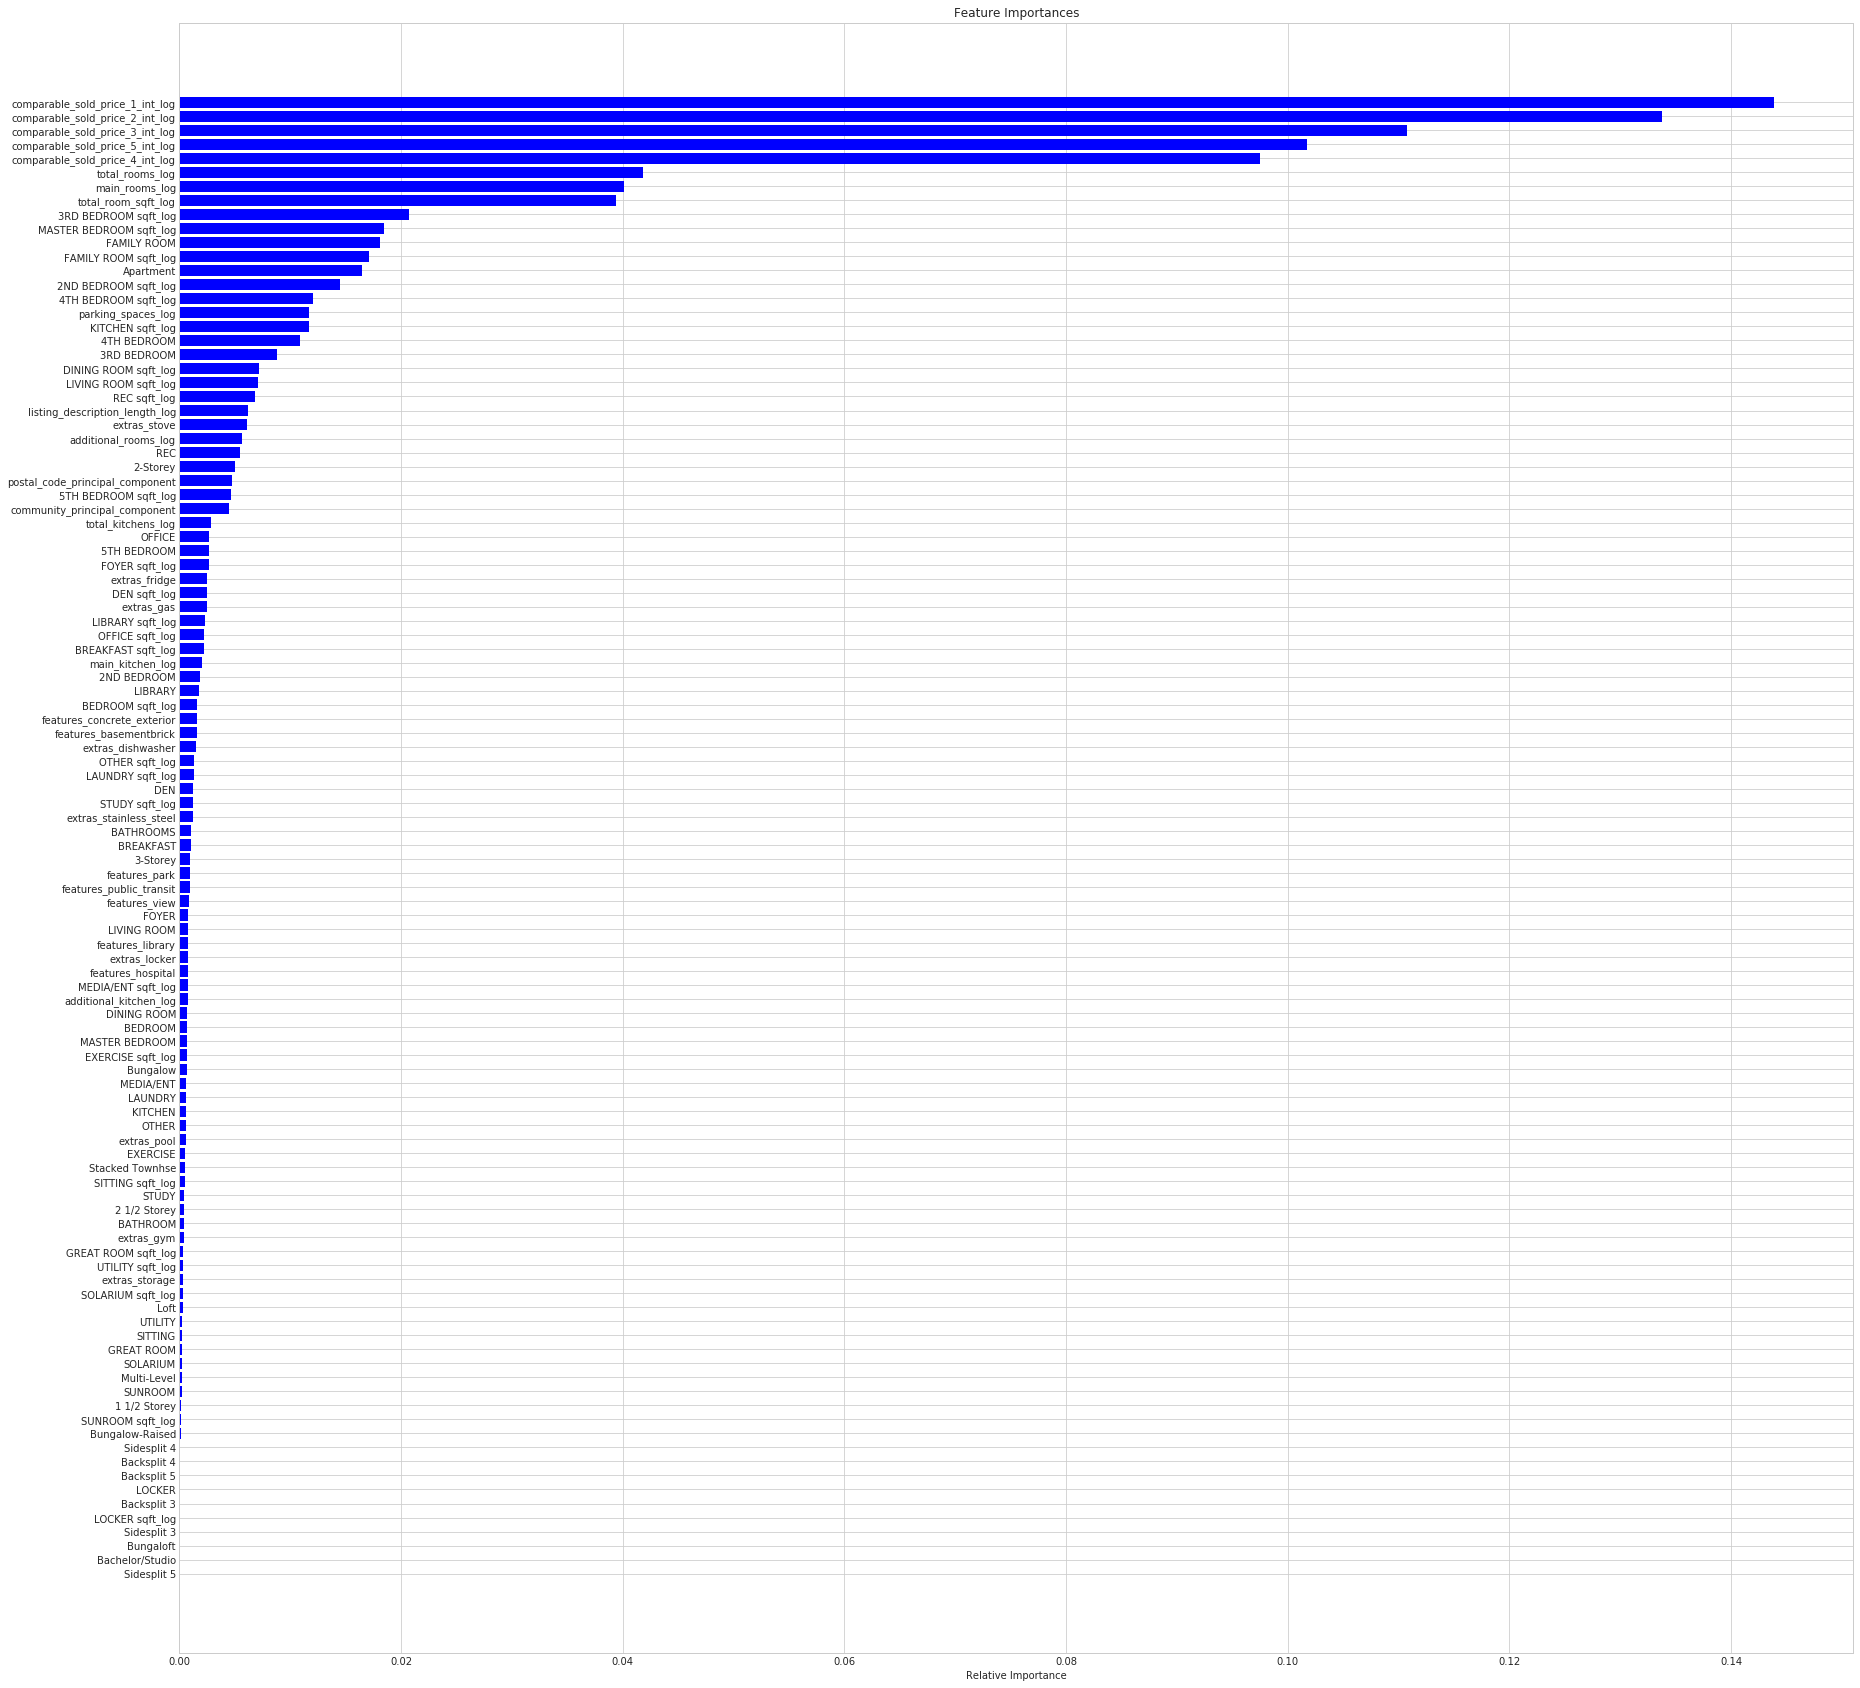

In [90]:
features=list(df_all_features_dataset.drop(['listing_url', 'listing_id', 'listing_price_int_log'], axis = 1))
importances = rf.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(30, 30))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
# plt.show()
plt.savefig('feature_importance.png')
